![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 3 - Discriminative Classification </center>
### <center> Support Vector Machine (SVM)</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/03_DiscriminativeClassfication/MainSVM.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size':16})

### Generate data:

In [2]:
N1  = 250
N2  = 200
mX1 = np.random.rand(2, N1) - 1/2 + np.array([[2], [1/3]])
mX2 = np.random.rand(2, N2) - 1/2 + np.array([[0], [1/3]])
vY1 = np.ones(N1)
vY2 = -np.ones(N2)

mX1[:,-1] = [2/3, .2]
mX        = np.r_[mX1.T, mX2.T]
vY        = np.concatenate([vY1, vY2])

### Plot

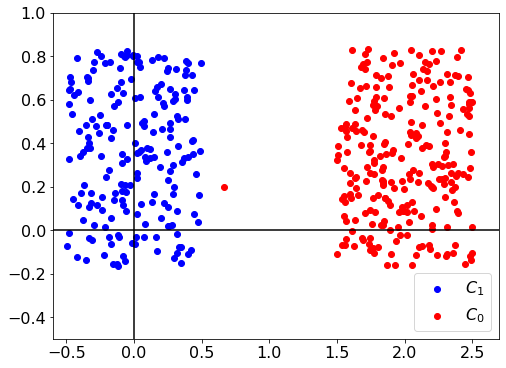

In [3]:
vIdx1 = vY == 1
plt.figure(figsize=(8,6))
plt.scatter(mX[~vIdx1,0], mX[~vIdx1,1],   color='b', label='$C_1$')
plt.scatter(mX[vIdx1,0],  mX[vIdx1,1],    color='r', label='$C_0$')
plt.legend()
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
vAxis = np.array([-.6, 2.7, -1/2, 1])
plt.axis(vAxis)
xlim  = vAxis[0:2]
plt.show()

### Train a SVM Classifier

In [4]:
from sklearn.svm import SVC

def PlotSVM(C):
    if C == 0:
        C = 1e-20

    #-- Train the linear SVM:
    SvmClassifier = SVC(C=C, kernel='linear').fit(mX, vY)
    
    #-- Get model params (only needed for the plot):
    vW = SvmClassifier.coef_[0]
    b  = -SvmClassifier.intercept_  
    
    plt.figure(figsize=(10, 6))
    plt.scatter(mX[vIdx1,0],  mX[vIdx1,1],  color='r', label='$C_0$')
    plt.scatter(mX[~vIdx1,0], mX[~vIdx1,1], color='b', label='$C_1$')
#     plt.legend()
    plt.axvline(x=0, color='k')
    plt.axhline(y=0, color='k')
    plt.plot(xlim, (b + 1 - vW[0] * xlim) / vW[1] , lw=4, color='orange', ls='--')
    plt.plot(xlim, (b + 0 - vW[0] * xlim) / vW[1] , lw=4, color='orange', ls='-')
    plt.plot(xlim, (b - 1 - vW[0] * xlim) / vW[1] , lw=4, color='orange', ls='--')
    plt.axis(vAxis)
    plt.title('$C = ' + str(C) + '$')

### $$\min_{\boldsymbol{w},b}\frac{1}{2}\left\Vert \boldsymbol{w}\right\Vert ^{2}+C\sum_{i}\xi_{i}$$
$$\xi_{i}:=\max\left\{ 0,1-y_{i}\left(\boldsymbol{w}^{T}\boldsymbol{x}_{i}-b\right)\right\} $$

In [5]:
from ipywidgets import interact, FloatSlider, Layout

cSlider = FloatSlider(min=0, max=100, step=1, value=1, layout=Layout(width='80%'))
interact(PlotSVM, C=cSlider)
plt.show()

interactive(children=(FloatSlider(value=1.0, description='C', layout=Layout(width='80%'), step=1.0), Output())…

### Exercise:
Train a linear SVM on the breast cancer data.  
* What is the best accuracy on the training data?  
* What is the optimal value of $C$?  

In [6]:
from sklearn.datasets import load_breast_cancer

dData = load_breast_cancer()
mX    = dData.data
vY    = dData.target

In [7]:
#-- Normalize data:
mX    = mX - np.mean(mX, axis=0)
mX    = mX / np.std (mX, axis=0)

mX.shape, vY.shape

((569, 30), (569,))

In [1]:
SvmClassifier = ???
SvmClassifier.score(mX, vY)

SyntaxError: invalid syntax (<ipython-input-1-e77bbeb70d98>, line 1)